# Practice makes perfect

The only way to master python is by writing in python. Let's use and combine what we learned to yet another real world data.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
%matplotlib inline
plt.style.use("..\class14\\astr19-matplotlib-defaults.txt")

In [12]:
fname = "data.csv"

x,y = np.loadtxt(fname,delimiter=',',skiprows=1,unpack=True)

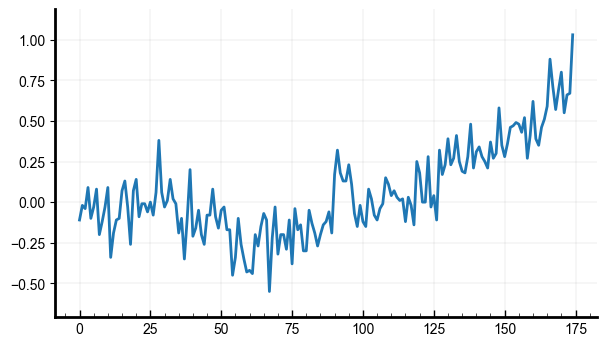

In [13]:
fig = plt.figure(figsize=(7,4))
plt.plot(x,y)
plt.show()

#### Apply Chauvenet criterion to each point successively

In [14]:
# for a gaussian of mean mu and standard deviation s
# this function gives the probability 
# of the event with value x to happen
def event_probability(x,mu=0.0,s=1.0):
    if s==0:
        return 0
            
	#z is how many sigma away x is from mean
    z = np.fabs((x-mu)/s)
    
    return 1.0 - erf(z/np.sqrt(2))

In [15]:

# apply the Chauvenet's criterion to an outlier, given prior_measurements
# returns True is the outlier can be discarded
# returns False if the outlier cannot be immediately discarded
def chauvenet_criterion(prior_measurements, outlier):
    #prior_measurements is our set of previous measurements
    #outlier is the value we want to check
    
    #compute mean and std of prior measurements
    #and assume these are representative of the gaussian
    mean = np.mean(prior_measurements)
    std = np.std(prior_measurements)

    #compute the probability of the outlier
    outlier_probability = event_probability(outlier,mu=mean,s=std)

    #get number of events, including new outlier
    N = len(prior_measurements)+1

    #check Chauvenet's criterion
    if( N*outlier_probability < 0.5):
        return True

    #if we are here, then the above condition was false
    #we cannot discard the outlier
    return False

In [16]:
# Apply Chauvenet's criterion to each consecutive point
# Start with i=1 and see if the 2nd point is outlier
# Then for i=2, see if 3rd point is outlier, etc.

# these two lists will contain the coordinates of points
# that were marked as outliers
outlier_x = []
outlier_y = []

for i in range(len(x)-1):
    # new list containing values of x going from index 0 to i
    partial_y = y[:i+1] 

    # if the next point is an outlier, add it to the list of outliers
    is_outlier = chauvenet_criterion(partial_y, y[i+1])
    if is_outlier:
        outlier_x.append(x[i+1])
        outlier_y.append(y[i+1])

In [17]:
# convert the two lists to numpy arrays
outlier_x = np.asarray(outlier_x)
outlier_y = np.asarray(outlier_y)

In [18]:
print(x)
print(outlier_x)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174.]
[  1.   3.   7.  11.  28.  37.  54.  67. 148. 166. 174.]


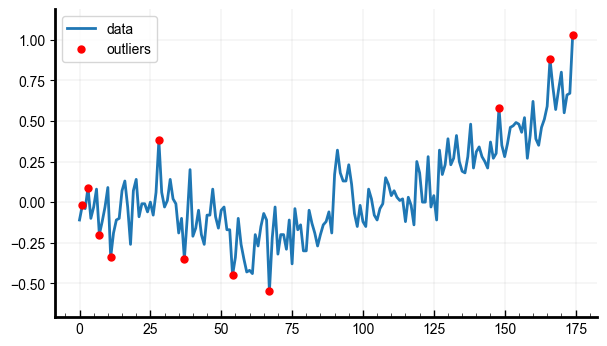

In [19]:
fig = plt.figure(figsize=(7,4))
plt.plot(x,y,label="data")
plt.plot(outlier_x,outlier_y,'ro',label="outliers")
plt.legend(loc=2)
plt.show()

#### Let's add some labels to explain what this data represents

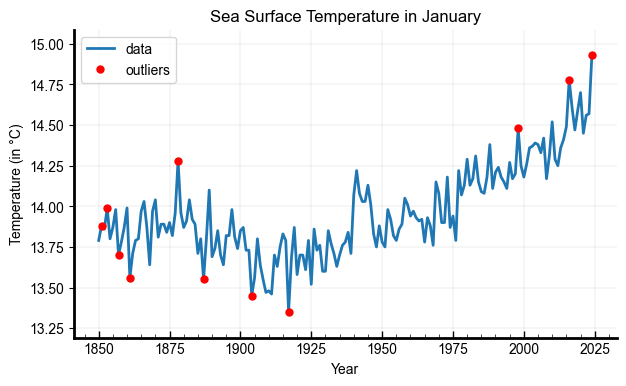

In [21]:
x_offset = 1850
y_offset = 13.9
fig = plt.figure(figsize=(7,4))
plt.plot(x+x_offset,y+y_offset,label="data")
plt.plot(outlier_x+x_offset,outlier_y+y_offset,'ro',label="outliers")

plt.xlabel("Year")
plt.ylabel("Temperature (in °C)")
plt.title("Sea Surface Temperature in January")

plt.legend(loc=2)
plt.show()

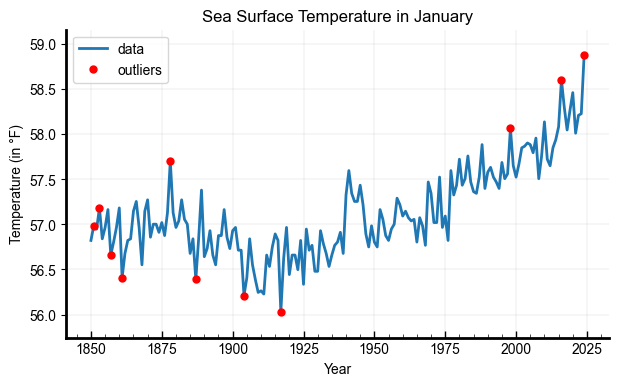

In [26]:
import my_astro_module as mam

x_offset = 1850
y_offset = 13.9

y_k = mam.c_to_f(y + y_offset)
y_out_k = mam.c_to_f(outlier_y + y_offset)

fig = plt.figure(figsize=(7,4))
plt.plot(x+x_offset,y_k,label="data")
plt.plot(outlier_x+x_offset,y_out_k,'ro',label="outliers")

plt.xlabel("Year")
plt.ylabel("Temperature (in °F)")
plt.title("Sea Surface Temperature in January")

plt.legend(loc=2)
plt.savefig('sst-january.png', bbox_inches="tight", facecolor='white')
plt.show()



#### A more detailed explanation of what's going on:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/SOI.svg/800px-SOI.svg.png" width=600>

<img src="https://lh3.googleusercontent.com/drive-viewer/AKGpihaF9YxsRF1PtiDMQ5eqRNhDgEL7wAxjmEU2emtmO3Mil2k5ADQEg3vxN1UANcXy4VXJPwGkJSs5E3uWKG0PKDpBwNzUKw=s1600" width=600>